# Assignment Week 3 - "Large" Datasets and Data Augmentation

## Task 1

Run the following two code cells to:

1. Download the ["Fast Food Classification Dataset - V2"](https://www.kaggle.com/datasets/utkarshsaxenadn/fast-food-classification-dataset/data) from Kaggle.

2. Unzip the data.

In [5]:
#!/bin/bash
!curl -L -o archive.zip https://www.kaggle.com/api/v1/datasets/download/utkarshsaxenadn/fast-food-classification-dataset

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
  0     0    0     0    0     0      0      0 --:--:-- --:--:-- --:--:--     0
100  820M  100  820M    0     0  75.4M      0  0:00:10  0:00:10 --:--:-- 62.3M


In [6]:
!unzip -q archive.zip

Ensure that the dataset is structured as follows (in Colab):

```
|
|-- Fast Food Classification V2
|   |-- TFRecords
|   |-- Test
|   |-- Train
|   `-- Valid
|-- sample_data
`-- archive.zip
```

`Fast Food Classification V2` and `archive.zip` should be on the same level as the already existing `sample_data` directory from Colab. You can ignore the `TFRecords` subdirectory in the following tasks.

## Task 2

1. Define the directory paths for training, validation, and test datasets.

2. Apply the provided `delete_invalid_images` function to check and remove any corrupted or invalid images in each of the three dataset directories.

In [7]:
TRAINING_DIRECTORY = "Fast Food Classification V2/Train"
VALIDATION_DIRECTORY = "Fast Food Classification V2/Valid"
TEST_DIRECTORY = "Fast Food Classification V2/Test"

In [8]:
import os
from PIL import Image

# Define the paths to the directories
directories = [
    TRAINING_DIRECTORY,
    VALIDATION_DIRECTORY,
    TEST_DIRECTORY
]

# Define supported image file extensions
supported_extensions = {".jpg", ".jpeg", ".png", ".gif", ".bmp"}

def delete_invalid_images(directory):
    """Goes through a directory and deletes any invalid or unsupported images."""
    for root, _, files in os.walk(directory):
        for file in files:
            file_path = os.path.join(root, file)
            # Check if the file has a supported extension
            if not any(file.lower().endswith(ext) for ext in supported_extensions):
                print(f"Deleting unsupported file: {file_path}")
                os.remove(file_path)
                continue

            try:
                with Image.open(file_path) as img:
                    img.load()  # Ensure the image content can be read
                    if img.format not in ["JPEG", "PNG", "GIF", "BMP"]:
                        raise IOError("Unsupported image format")
            except (IOError, SyntaxError, AttributeError) as e:
                print(f"Deleting invalid or corrupted image: {file_path}")
                os.remove(file_path)

# Run the function for each directory
for directory in directories:
    delete_invalid_images(directory=directory)

print("Invalid and unsupported image cleanup completed.")

Deleting invalid or corrupted image: Fast Food Classification V2/Train/Hot Dog/Hot Dog - Train (59).jpg
Invalid and unsupported image cleanup completed.


# Task 3

1. Implement a function that visualizes 3 random examples per class from the training data to get a feel for the dataset.

2. Run the function multiple times to get different images from the dataset.

Hint: You can use whatever Python packages you like. `opencv` and `matplotlib` might be suitable choices. You can also check out the visualization functions in the second assignment notebooks of weeks 1 and 2 for reference.

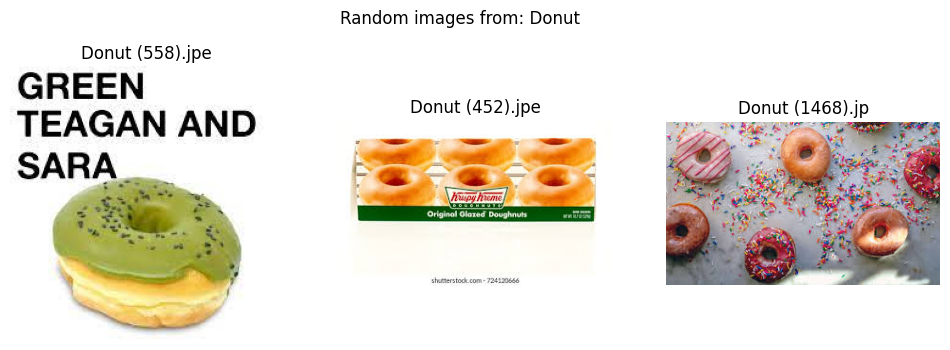

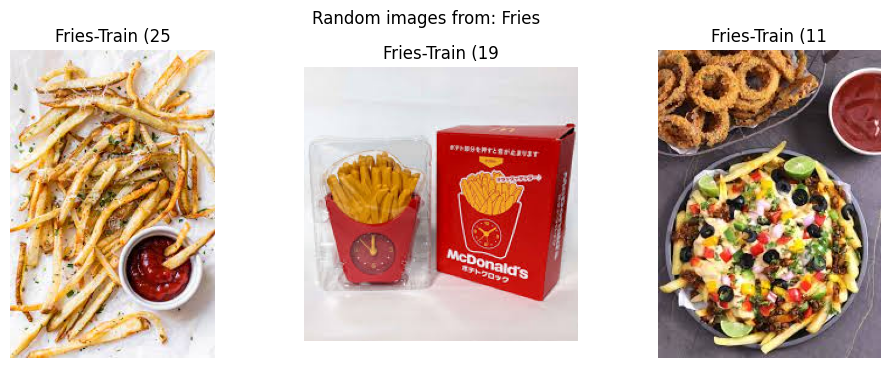

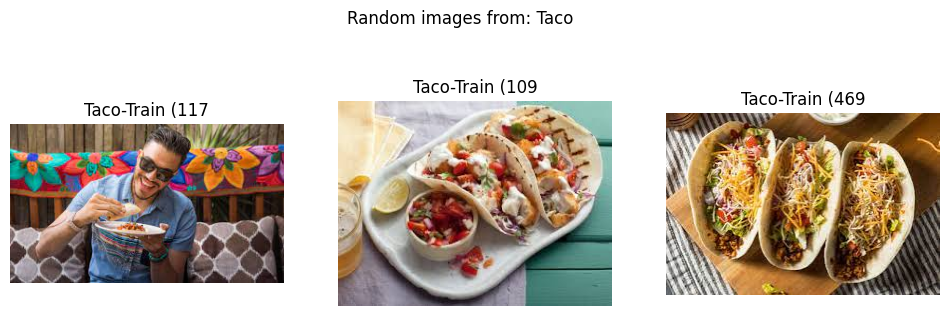

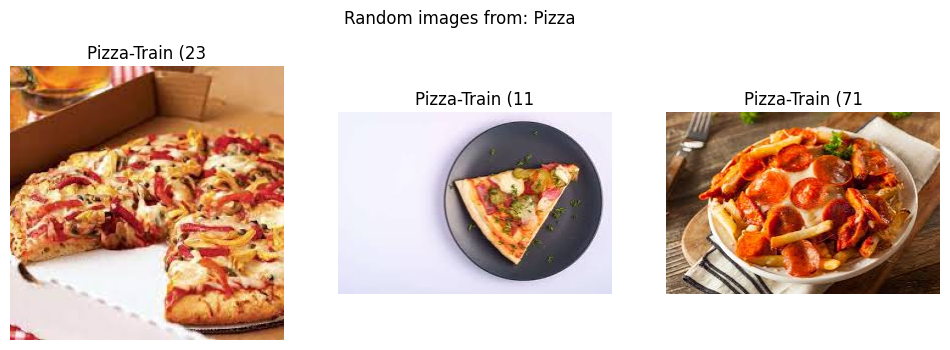

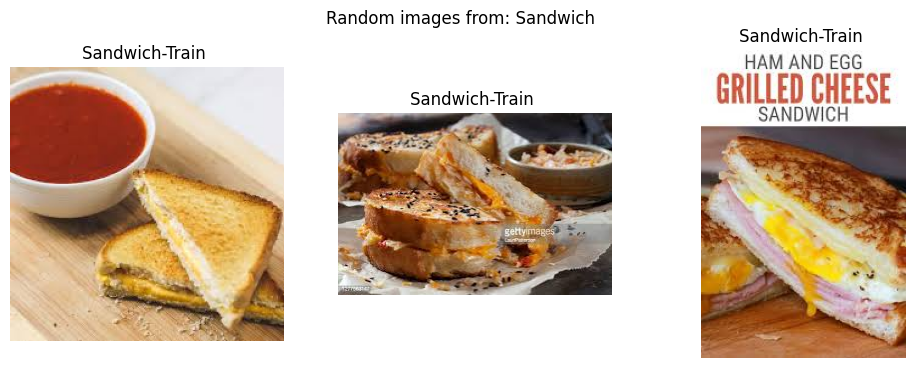

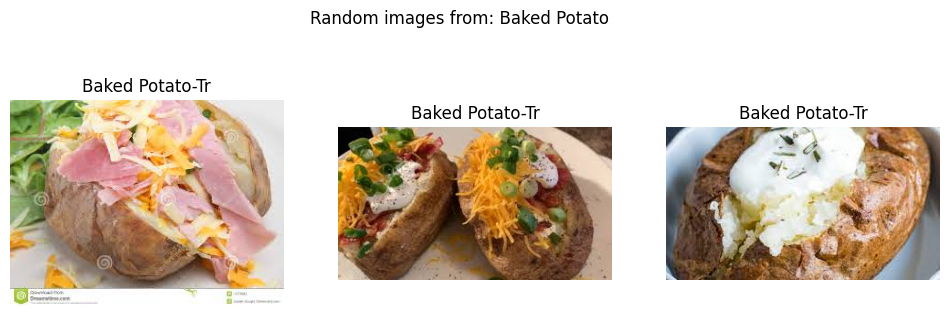

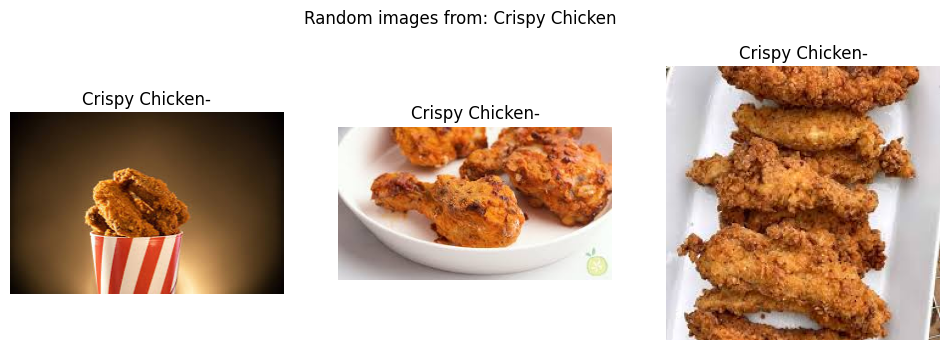

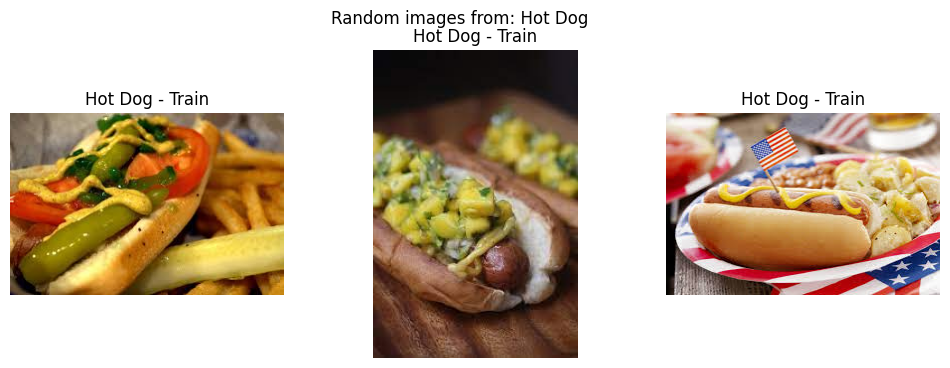

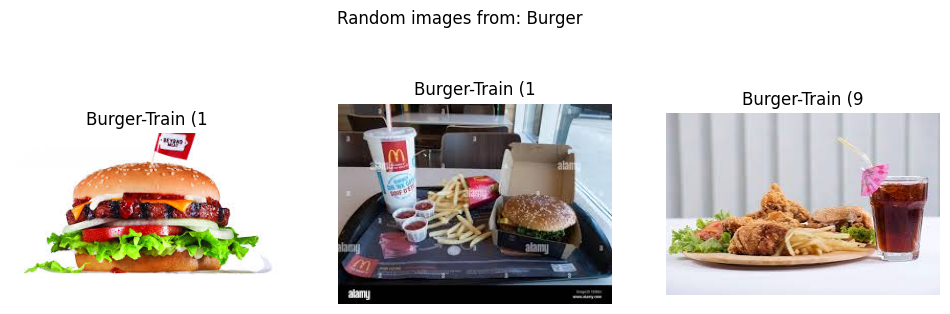

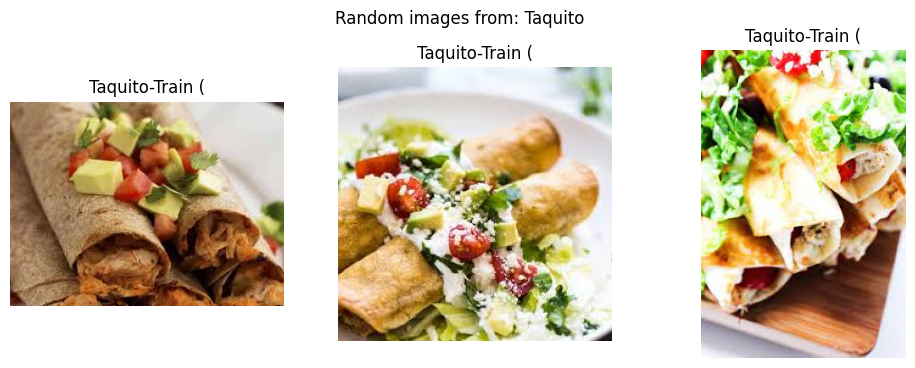

In [9]:
import os
import random
from PIL import Image
import matplotlib.pyplot as plt

def visualize_random_images(directory_path, number_of_images=3):
    # Ensure the directory exists and is a directory
    if not os.path.isdir(directory_path):
        print(f"Directory not found: {directory_path}")
        return

    # Get all image files in the directory
    image_files = [f for f in os.listdir(directory_path) if f.lower().endswith(('.png', '.jpg', '.jpeg', '.gif', '.bmp'))]

    # TODO: Implement the rest of the function
    # YOUR CODE STARTS HERE

    if len(image_files) == 0:
        print(f"No images found in {directory_path}")
        return

    # Select a random sample of images
    selected_images = random.sample(image_files, min(number_of_images, len(image_files)))

    plt.figure(figsize=(12, 4))
    for i, image_file in enumerate(selected_images):
        image_path = os.path.join(directory_path, image_file)
        image = Image.open(image_path)
        plt.subplot(1, len(selected_images), i + 1)
        plt.imshow(image)
        plt.axis("off")
        plt.title(image_file[:15])  # show first 15 chars of filename
    plt.suptitle(f"Random images from: {os.path.basename(directory_path)}")
    plt.show()

    # YOUR CODE ENDS HERE

# Ensure TRAINING_DIRECTORY is defined from previous cells
if 'TRAINING_DIRECTORY' not in locals():
    print("TRAINING_DIRECTORY not defined. Please run previous cells.")
else:
    # Get class directories within the training directory
    class_directories = [d for d in os.listdir(TRAINING_DIRECTORY) if os.path.isdir(os.path.join(TRAINING_DIRECTORY, d))]

    for class_directory in class_directories:
        full_class_path = os.path.join(TRAINING_DIRECTORY, class_directory)
        visualize_random_images(full_class_path)


# Task 4

1. Choose an appropriate image size for the input images for an image classification task and set the values of the predefined constants `IMAGE_HEIGHT` and `IMAGE_WIDTH`.

2. Load the training, validation and test datasets using the `image_dataset_from_directory` function shown in the first 7 minutes of [this video](https://www.youtube.com/watch?v=q7ZuZ8ZOErE). Specifically, set appropriate values for `label_mode`, `batch_size`, `image_size`, and `shuffle`. Each dataset should get a fixed `seed` of `123`.
Check out the documentation for details:
https://www.tensorflow.org/api_docs/python/tf/keras/preprocessing/image_dataset_from_directory

    Hint: When selecting a value for `label_mode`, look at the loss function used below when compiling the model.

3. Briefly explain for which of the training, validation and test datasets might be important to shuffle the data and why this is important.

In [10]:
import tensorflow as tf

In [15]:
BATCH_SIZE = 64
IMAGE_HEIGHT = 50 # TODO: Choose an appropriate image height
IMAGE_WIDTH = 50 # TODO: Choose an appropriate image width

In [13]:
train_images = ... # TODO: Load the training dataset from the corresponding directory

validation_images = ... # TODO: Load the validation dataset from the corresponding directory

test_images = ... # TODO: Load the test dataset from the corresponding directory

**Expected output:**  
Found 14999 images belonging to 10 classes.  
Found 3500 images belonging to 10 classes.  
Found 1500 images belonging to 10 classes.  

# Task 5

In this exercise you will be given a predefined model architecture (except for the data-augmentation layers) that you should train using the data with and without the application of data augmentation and compare the results of the different models.

1. Before defining the data-augmentation layers, train the model without data augmentation for at least 30 epochs (this may take some time). To do so, just run the code cell after the next one with the `data_augmentation_layers` commented out. Save a screenshot of the resulting accuracy and loss plots and judge the quality of the model. Also note the loss and accuracy of the model on the test set.

2. Use the time that the first model is training to research and implement suitable data-augmentation layers. Choose 2 to 3 data augmentation techniques (other than rescaling) that might be suitable for the given dataset, and briefly explain why. Then train the model again, this time using data augmentation for the same number of epochs as the previous model. Compare the training and model quality of the two models.

Take a look at the documentation for available image-augmentation layers in TensorFlow/Keras:
https://keras.io/api/layers/preprocessing_layers/image_augmentation/

You can also take inspiration from the augmentations used in the [video from the course material](https://www.youtube.com/watch?v=yke3zUGgQ-w)

In [ ]:
data_augmentation_layers = tf.keras.Sequential([
    # TODO: Add data-augmentation layers
    ...
])

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Input((IMAGE_HEIGHT, IMAGE_WIDTH, 3)),
    tf.keras.layers.Rescaling(1/255),

    # TODO: Train the model with and without your data-augmentation layers by (un-)commenting the following line, and compare the performance
    # data_augmentation_layers,

    tf.keras.layers.Conv2D(32, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation="relu"),
    tf.keras.layers.MaxPool2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation="relu"),
    tf.keras.layers.Dense(64, activation="relu"),
    tf.keras.layers.Dense(10, activation="softmax"),
])

In [ ]:
model.compile(
    optimizer=tf.keras.optimizers.Adam(),
    loss=tf.keras.losses.CategoricalCrossentropy(),
    metrics=["accuracy"],
)

history = model.fit(
    train_images,
    validation_data=validation_images,
    epochs=30,
)

In [ ]:
import matplotlib.pyplot as plt

# Plot the model training history
def plot_training_history(history):
    # Extracting accuracy and loss from the history object
    training_accuracy = history.history["accuracy"]
    validation_accuracy = history.history["val_accuracy"]
    training_loss = history.history["loss"]
    validation_loss = history.history["val_loss"]

    # Setting up the number of epochs for the x-axis
    epochs_range = range(1, len(training_accuracy) + 1)

    # Plotting training and validation accuracy
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.plot(epochs_range, training_accuracy, label="Training Accuracy")
    plt.plot(epochs_range, validation_accuracy, label="Validation Accuracy")
    plt.xlabel("Epochs")
    plt.ylabel("Accuracy")
    plt.title("Training and Validation Accuracy")
    plt.legend()

    # Plotting training and validation loss
    plt.subplot(1, 2, 2)
    plt.plot(epochs_range, training_loss, label="Training Loss")
    plt.plot(epochs_range, validation_loss, label="Validation Loss")
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.title("Training and Validation Loss")
    plt.legend()

    plt.tight_layout()
    plt.show()

plot_training_history(history)

In [ ]:
# Calculate loss and accuracy on the test set
test_loss, test_accuracy = model.evaluate(test_images)
print(f"Test Accuracy: {test_accuracy} | Test Loss: {test_loss}")